In [33]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 500
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# fix all of our plot backgrounds
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat
from homer_preprocessing import read_annotated_peaks, import_homer_diffpeak, pull_comparisons_get_diff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6

# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

In [35]:
atacDirectory = '/home/h1bennet/strains/results/06_Strains_Control_Cohort2_ATAC/'
h3k27acDirectory = '/home/h1bennet/strains/results/06b_Strains_Control_Combined_H3K27Ac/'
workingDirectory = '/home/h1bennet/strains/results/10_Strains_Manuscript_Prep/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


### Make output directory

In [36]:
if not os.path.isdir('./atac_ghist/'):
    os.mkdir('./atac_ghist/')

# 3 x 1 long version

In [42]:
mm_conv = 25.4

KeyboardInterrupt: 

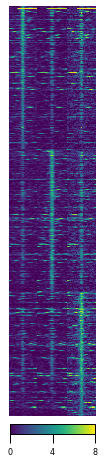

In [47]:
fig, axs = plt.subplots(3, 1, figsize=(40/mm_conv, 200/mm_conv))
plt.subplots_adjust(hspace=0)

for i, ax in zip(np.sort(glob.glob(atacDirectory+'/peak_heatmaps/*intersection*ghist.txt')), axs.flat):

    # read in pre-made ghists
    df = pd.read_csv(i,
                 sep='\t',
                 index_col=0)
    
    hm = sns.heatmap(np.log2(df+1),
            cmap='viridis',
            cbar=False,
            vmax=8,
            xticklabels=0,
            yticklabels=0,
            ax=ax)
    
    hm.set(ylabel=None)
    
cmap = matplotlib.cm.viridis
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm,  cmap=cmap),
                  ax=axs[2],
                  orientation='horizontal',
                  ticks=[0,4,8],
                  use_gridspec=True,
                  shrink=1,
                  pad=0.05,
                  fraction=0.075,
                  aspect=8
                  )
cb.ax.tick_params(labelsize=8)

plt.savefig(
    './atac_ghist/atac_strain_unique_viridis.pdf',
    dpi=500,
    bbox_inches='tight')

# Simple plot (final version)

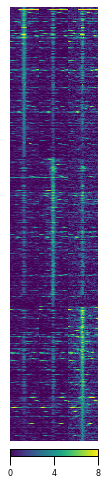

In [52]:
fig, axs = plt.subplots(3, 1, figsize=(40/mm_conv, 210/mm_conv))
plt.subplots_adjust(hspace=0)
for i, ax in zip(np.sort(glob.glob(atacDirectory+'/peak_heatmaps/*intersection*ghist.txt')), axs.flat):   
    
    df = pd.read_csv(i,
                 sep='\t',
                 index_col=0)
    
    hm = sns.heatmap(np.log2(df+1),
            cmap='viridis',
            cbar=False,
            vmax=8,
            xticklabels=0,
            yticklabels=0,
            ax=ax)
    
    hm.set(ylabel=None)
    
cmap = matplotlib.cm.viridis
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm,  cmap=cmap),
                  ax=axs[2],
                  orientation='horizontal',
                  ticks=[0,4,8],
                  use_gridspec=True,
                  shrink=1,
                  pad=0.05,
                  fraction=0.05,
                  aspect=12
                  )

cb.ax.tick_params(labelsize=8)

plt.savefig(
    './atac_ghist/atac_strain_unique_viridis.png',
    dpi=500,
    bbox_inches='tight')

# 1 x 3 wide version

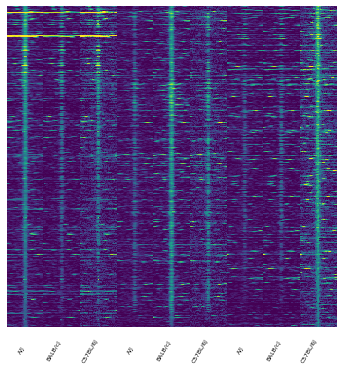

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(150/mm_conv, 150/mm_conv))
plt.subplots_adjust(wspace=0)
for i, ax in zip(np.sort(glob.glob(atacDirectory+'/peak_heatmaps/*intersection*ghist.txt')), axs.flat):
    df = pd.read_csv(i,
                 sep='\t',
                 index_col=0)
    
    hm = sns.heatmap(np.log2(df+1),
            cmap='viridis',
            cbar=False,
            vmax=8,
            xticklabels=0,
            yticklabels=0,
            ax=ax)
    
    hm.set(ylabel=None)
    
    ax.text(1/6, -0.07,'A/J', horizontalalignment='right',
            verticalalignment='center',
            c='black',
            rotation=60,
            transform=ax.transAxes)
    ax.text(3/6, -0.07,'BALB/cJ', horizontalalignment='right',
            verticalalignment='center',
            c='black',
            rotation=60,
            transform=ax.transAxes)
    ax.text(5/6, -0.07,'C57BL/6J', horizontalalignment='right',
            verticalalignment='center',
            c='black',
            rotation=60,
            transform=ax.transAxes)
    # print(figpath)
    # plt.savefig(figpath)

In [ ]:
""